Salary Analysis
===============
This projects aims to analyse salaries in the tech industry. The dataset used for this projects is sourced from Kaggle.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import janitor
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset 
df = pd.read_csv("../00_raw_data/ds_salaries.csv")
df.head()

,id,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type
0,0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L,FT
1,1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,FT
2,2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,FT
3,3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S,FT
4,4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L,FT


Data Preprocessing
------------------

In [3]:
# Clean column names 
df = df.clean_names()
print(df.columns)

Index(['id', 'work_year', 'experience_level', 'job_title', 'salary',
       'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'employment_type'],
      dtype='object')


In [4]:
# Check for missing values 
df.isnull().sum()

id                    0
work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
employment_type       0
dtype: int64

In [5]:
# Check for duplicates
sum(df.duplicated())

0

Descriptive Statistics 
----------------------


In [6]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

The summary of salary in USD gives a good overview to the distribution of salary in USD in the dataset. The range of salary is quite wide. The salary ranges from 2,859.00 USD to 600,000.00 USD. The average salary is 112,298.00 USD. 25% of the salary is lower than 62,726.00 USD(1st Quartile) and 75% of the salaries is higher than 150,000.00 USD(3rd Quartile).
The average salary is greater than the median salary which indicates that it is a positively skewed, hence it is skewed to the right.

Exploratory Data Analysis
-------------------------

Bar plot - experience level

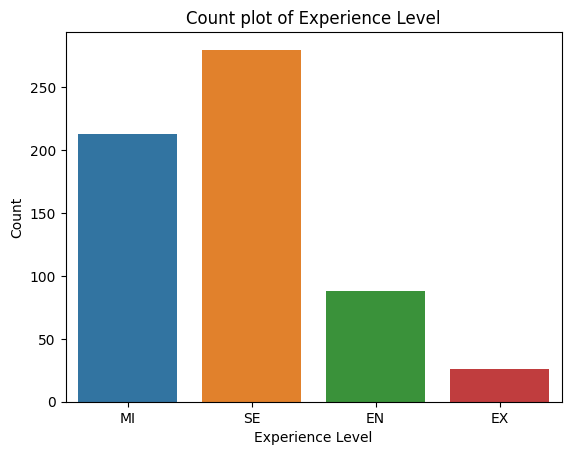

In [7]:
sns.countplot(data = df, x = 'experience_level', hue='experience_level')
plt.title('Count plot of Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

This Counts plot depicts the distribution of experience levels among a group of individuals. The x-axis represents different experience levels, while the y-axis shows the count of individuals in each category. Here's a breakdown of the information presented: 
- EN (Entry): this is the third largest group with approximately 100 individuals
- EX (Expert): this is the smallest group with approximately 50 individuals.
- MI (Mid-level): this is the second-largest group with approximately 200 individuals.
- SE (Senior): this is the largest group with  over 250 individuals.

Bar plot - company size and salary in usd

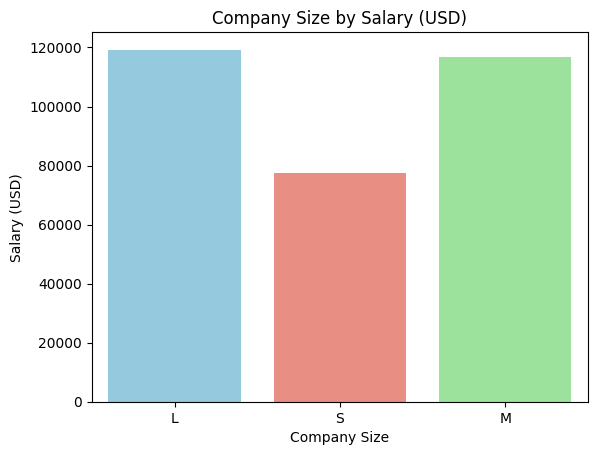

In [8]:
# # Step 1: Group the data and compute mean and standard deviation
# grouped = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'std']).reset_index()

# # Step 2: Create the custom palette
# custom_palette = {'L': 'skyblue', 'M': 'lightgreen', 'S': 'salmon'}

# # Step 3: Map colors to company sizes
# colors = grouped['company_size'].map(custom_palette)

# # Step 4: Plot using matplotlib directly
# plt.figure(figsize=(8, 6))
# plt.bar(
#     x=grouped['company_size'],
#     height=grouped['mean'],
#     yerr=grouped['std'],
#     color=colors,
#     capsize=10,
#     edgecolor='black'
# )

# # Step 5: Add titles and labels
# plt.title('Company Size by Salary (USD)', fontsize=14)
# plt.xlabel('Company Size', fontsize=12)
# plt.ylabel('Average Salary (USD)', fontsize=12)

# # Step 6: Show the plot
# plt.tight_layout()
# plt.show()

custom_palette = {'L': 'skyblue', 'M': 'lightgreen', 'S': 'salmon'}

sns.barplot(data=df, x='company_size', y= 'salary_in_usd', palette=custom_palette, ci=None)
plt.title('Company Size by Salary (USD)')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

The bar plot illustrates the relationship between company size and salary in USD. The x-axis denotes various company sizes, while the y-axis shows salary amounts in USD. The data can be summarized as follows:
- Large (L): Offers the highest salary among the three company sizes.
- Medium (M): Provides a moderate salary, ranking second after large companies.
- Small (S): Has the lowest salary compared to both medium and large companies.

There could be outliers in the salary data, particularly in the large company category, where some salaries are significantly higher than the rest. This suggests that while large companies generally pay more, there are exceptional cases that skew the average salary upwards.

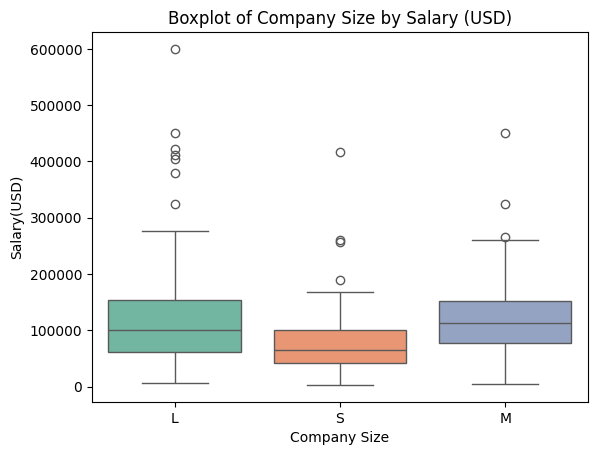

In [9]:
sns.boxplot(data=df, x='company_size', y='salary_in_usd',palette='Set2')
plt.title('Boxplot of Company Size by Salary (USD)')
plt.xlabel('Company Size')
plt.ylabel('Salary(USD)')
plt.show()

The boxplot illustrates the distribution of salaries across different company sizes. The x-axis represents company sizes, while the y-axis shows salary amounts in USD. The boxplot provides a visual summary of the data, including the median, quartiles and potential outliers. Here's a breakdown of the information presented:
- Large (L): The median salary is around 100,000 USD. There are several outliers above the upper whisker, indicating exceptionally high salaries.
- Medium (M): The median salary is approximately 100,000 USD. There are a few outliers above the upper whisker, but they are less pronounced than in the large company category.
- Small (S): The median salary is around 70,000 USD. There are fewer outliers compared to the other two categories, indicating a more consistent salary distribution.

Bar plot - salary in usd and experience level

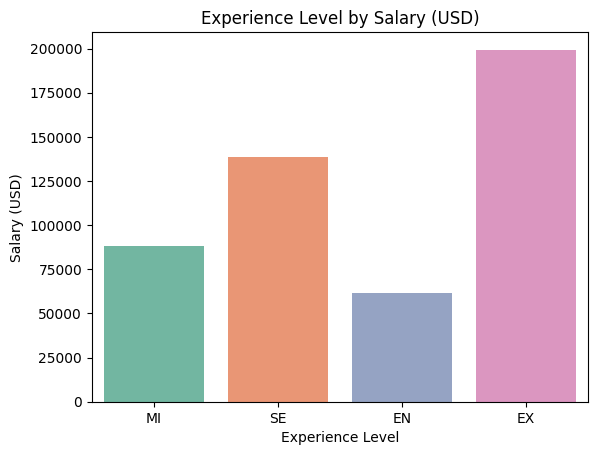

In [10]:
sns.barplot(data=df, x=df['experience_level'], y=df['salary_in_usd'], palette='Set2', ci=None)
plt.title('Experience Level by Salary (USD)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

The bar plot illustrates the distribution of salaries across different experience levels. The x-axis represents the experience levels, while the y-axis shows the salary amounts in USD. The bar plot provides a visual summary of the data. Here is the break down of information presented: 
- Experience (EX) Level: Earns the highest salary among the four experience levels.
- Senior (SE) Level: Earns the second highest salary after experience levels.
- Medium (MI) Level: Earns a moderate salary, ranking third,
- Entry (EN) Level: Earns the lowest salary compared to the other experience levels.

Thee could also be outliers in the salary data particularly in the experience category, where some salaries are significantly higher than the rest.

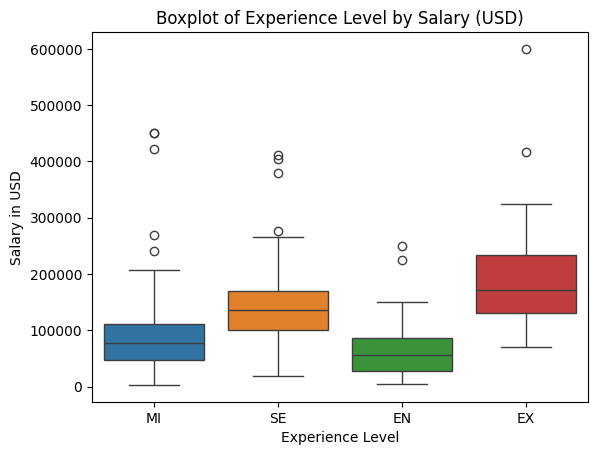

In [11]:
sns.boxplot(data=df , x = df['experience_level'], y = df['salary_in_usd'], hue='experience_level')
plt.title('Boxplot of Experience Level by Salary (USD)')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

The boxplot illustrates the distribution of salaries across different experience levels. The x-axis represents experience levels, while the y-axis shows salary amounts in USD. The boxplot provides a visual summary of the data, including the median, quartiles and potential outliers. Here's a breakdown of the information presented:
- Experience (EX) Level: The median salary is approximately 150,000 USD. There are several outliers above the upper whisker, indicating exceptionally high salaries.
- Senior (SE) Level: The median salary is approximately 120,000 USD. There are a few outliers above the upper whisker, but they are less pronounced than in the experience level category.
- Medium (MI) Level: The median salary is appproximately 80,000 USD. There are fewer outliers compared to the other two categories, indicating a more consistent salary distribution.

Count plot - Employment Type 

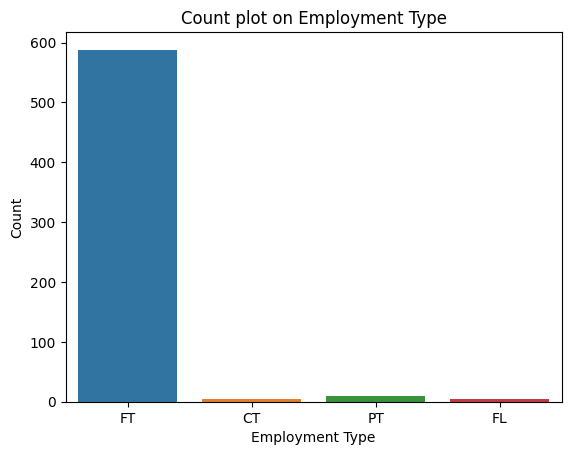

In [38]:
sns.countplot(data = df, x = df['employment_type'], hue=df['employment_type'])
plt.title('Count plot on Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

This count plot illustrates the distribution of employment types among a group of individuals. The x-axis represents different employment types, while the y-axis shows the count of individuals in each category. Here's a breakdown of the information presented:
- Full-time (FT): This is the largest group with over 500 individuals.
- Part-time (PT): This is the second largest group with less than 50 individuals.
- Freelance (FL): This is the third largest group with less than  25 individuals.
- Contract (CT): This is the smallest group with less than 20 individuals.

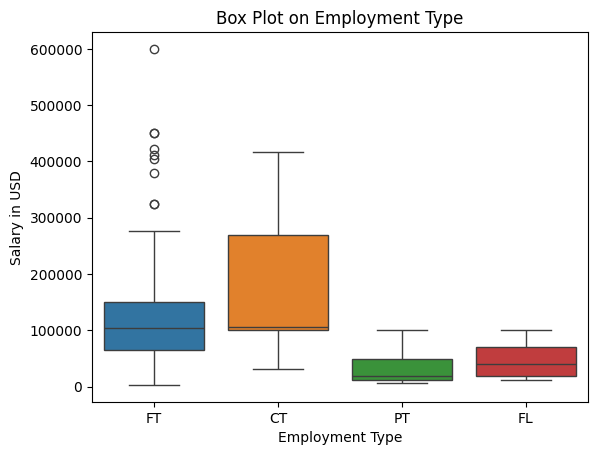

In [19]:
sns.boxplot(data=df, x=df['employment_type'], y=df['salary_in_usd'], hue=df['employment_type'])
plt.title('Box Plot on Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.show()

Box plot - Employment Type and Salary in USD 
The boxplot illustrates the distribution of salaries across different employment types. The x-axis represents employment types, while the y-axis shows salary amounts in USD. The boxplot provides a visual summary of the data, including the median, quartiles and potential outliers. Here's a breakdown of the information presented:
- Full-time (FT): The median salary is around 100,000 USD There are several outliers above the upper whisker, indicating exceptionally high salaries.
- Part-time (PT): The median salary is approximately 50,000 USD. 
- Freelance (FL): The median salary is around 60,000 USD. 
- Contract (CT): The median salary is around 70,000 USD, with a range extending up to 180,000 USD.

Bar plot - Salary in USD and Job Title

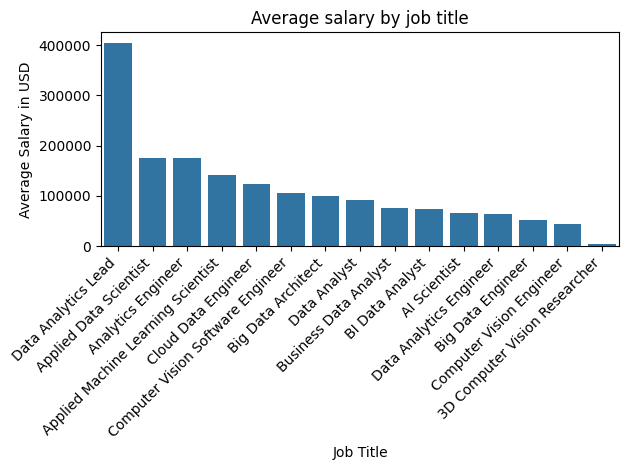

In [39]:
top_n = 15 

group_job_salary = (
    df.groupby('job_title')['salary_in_usd'].agg(['mean']).reset_index().head(top_n).sort_values('mean', ascending=False))

group_job_salary.head()

sns.barplot(data=group_job_salary,  x=group_job_salary['job_title'], y=group_job_salary['mean'])
plt.title('Average salary by job title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This bar plot shows the average salaries for various job titles. The x-axis represents different job titles, while the y-axis shows the average salary in USD. Here's a breakdown of the information presented: The highest-paying job title appears to be "Data Analytics Lead". Other high paying roles include Applied Data Scientist, Analytics Engineer, Applied Machine Learning Scientist and Cloud Data Engineer. The lowest paying job title among those shown is 3D Computer Vision Researcher. 

This visualization displays the salary hierarchy among various data-related job titles, highlighting the financial value placed on different skills and positions within the industry.

Conclusion
-----------
In conclusion, the analysis of salaries in the tech industry reveals several key insights:
1. **Experience Level**: Senior and experienced professionals tend to earn significantly higher salaries compared to mid-level and entry-level employees.
2. **Company Size**: Larger companies generally offer higher salaries than medium and small companies, although there are outliers in the large company category that skew the average salary upwards.
3. **Employment Type**: Full-time employees earn the highest salaries, followed by contract, freelance and part-time workers.
4. **Salary Distribution**: The salary distribution is positively skewed, with a wide range of salaries and several outliers, particularly among senior and experienced professionals
5. **Data Visualization**: The use of bar plots and box plots illustrates the relationships between experience level, company size, employment type, and salary, providing a clear visual representation of the data.
